In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris.data[:,[2,3]]
y = iris.target

In [ ]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])
print(iris_df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [ ]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
print(x_train.shape[0], x_test.shape[0])

105 45


In [ ]:
# scaling the daa
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
print("After standardizing our features")
print(pd.DataFrame(x_train_std, columns = iris_df.columns).head())
print(pd.DataFrame(x_test_std, columns = iris_df.columns).head())

After standardizing our features
   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246
   petal length (cm)  petal width (cm)
0           0.707938          1.510067
1           0.095452         -0.293181
2          -1.352242         -1.323609
3           1.376105          0.737246
4          -1.296561         -1.323609


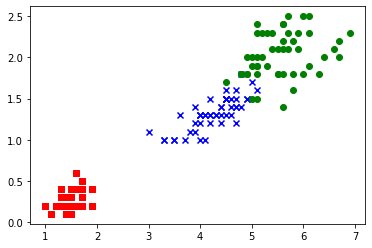

In [ ]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

In [ ]:
# performing linear SVC
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma = 0.1, C = 1.0)
svm.fit(x_train_std, y_train)
print("Accuracy of traning data set: ",svm.score(x_train_std, y_train)*100)
print("Accuracy of testing data set: ",svm.score(x_test_std, y_test)*100)

Accuracy of traning data set:  95.23809523809523
Accuracy of testing data set:  97.77777777777777


In [ ]:
def versiontuple(v):
  return tuple(map(int, (v.split("."))))

def plot_decision_regions(x,y, classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', 'o')
  clr = ('black', 'blue', 'red')
  colors = ('lightpink', 'lightblue', 'lightgreen')
  cc= ListedColormap(clr[:len(np.unique(y))])
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:, 0].min()-1, x[:,0].max()+1
  x2_min, x2_max = x[:, 1].min()-1, x[:, 0].max()+1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution) , np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, aplha = 0.4, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x[y==cl, 0], y =x[y==cl, 1], alpha = 0.8, c= cc(idx), marker = markers[idx], label = cl)

<ipython-input-62-ab59ce5c45e7>:19: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx1, xx2, Z, aplha = 0.4, cmap = cmap)


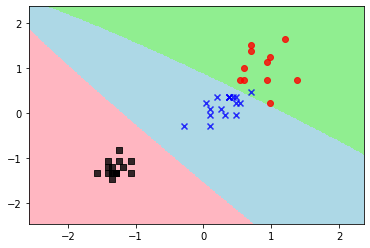

In [ ]:
plot_decision_regions(x_test_std, y_test, svm)